In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
data = []
with open('JointData.txt', 'r') as f:
    for line in f.readlines():
        tok = line.replace('\\n', '').split(' ')
        data.append([float(i) for i in tok])

In [3]:
def transform(a_arr, alpha_arr, d_arr, theta_arr):
    pose = np.identity(4)
    for i in range(len(theta_arr)):
        a, alpha, d, theta = a_arr[i], alpha_arr[i], d_arr[i], theta_arr[i]
        rot = np.matrix([
            [np.cos(theta), -np.sin(theta), 0, 0],
            [np.sin(theta),  np.cos(theta), 0, 0],
            [0            ,              0, 1, d],
            [0            ,              0, 0, 1],
        ])
        trans = np.matrix([
            [1,             0,              0, a],
            [0, np.cos(alpha), -np.sin(alpha), 0],
            [0, np.sin(alpha),  np.cos(alpha), 0],
            [0,             0,              0, 1],
        ])
        pose = np.matmul(pose, np.matmul(rot, trans))
    return pose

Text(0.5,0,'z')

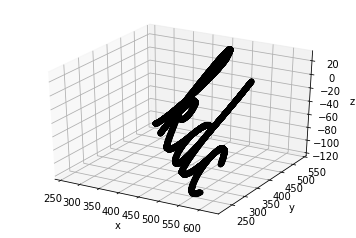

In [11]:
a_arr = [0, 0, 45, -45, 0, 0, 0]
alpha_arr = [-np.pi/2, np.pi/2, -np.pi/2, np.pi/2, -np.pi/2, np.pi/2, 0]
d_arr = [0, 0, 550, 0, 300, 0, 60+120]
f = open("trajectory.txt", "a")

ax = plt.gca(projection='3d')
for theta_arr in data:
    pose = transform(a_arr, alpha_arr, d_arr, theta_arr)
    f.write('%s %s %s\n' % (pose[0,3], pose[1,3], pose[2,3]))
    ax.scatter(pose[0,3], pose[1,3], pose[2,3], c='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')